# 서울특별시 코로나19 백신 예방접종 현황
- 데이터 링크 : http://data.seoul.go.kr/dataList/OA-20914/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.options.display.float_format = '{:.2f}'.format

In [5]:
cd /content/drive/MyDrive/일일 데이터 분석

/content/drive/MyDrive/일일 데이터 분석


In [15]:
# 2021. 04. 21 ~ 2022. 12. 07
data = pd.read_csv('./서울시 코로나19 백신 예방접종 현황.csv',encoding='cp949')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   접종일          572 non-null    object 
 1   접종대상자        572 non-null    int64  
 2   당일 1차접종자 수   572 non-null    int64  
 3   1차접종 누계      572 non-null    int64  
 4   1차접종률(%)     572 non-null    float64
 5   당일 2차접종자 수   572 non-null    int64  
 6   2차접종 누계      572 non-null    int64  
 7   2차접종률(%)     572 non-null    float64
 8   당일 3차접종자 수   397 non-null    float64
 9   3차접종 누계      397 non-null    float64
 10  3차접종률(%)     381 non-null    float64
 11  당일 4차접종자 수   243 non-null    float64
 12  4차접종 누계      243 non-null    float64
 13  4차접종률(%)     243 non-null    float64
 14  당일 동절기접종자 수  63 non-null     float64
 15  동절기접종 누계     63 non-null     float64
 16  동절기접종률(%)    63 non-null     float64
dtypes: float64(11), int64(5), object(1)
memory usage: 76.1+ KB


In [8]:
data.isnull().sum()

접종일              0
접종대상자            0
당일 1차접종자 수       0
1차접종 누계          0
1차접종률(%)         0
당일 2차접종자 수       0
2차접종 누계          0
2차접종률(%)         0
당일 3차접종자 수     175
3차접종 누계        175
3차접종률(%)       191
당일 4차접종자 수     329
4차접종 누계        329
4차접종률(%)       329
당일 동절기접종자 수    509
동절기접종 누계       509
동절기접종률(%)      509
dtype: int64

In [16]:
data.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),당일 동절기접종자 수,동절기접종 누계,동절기접종률(%)
0,2023.01.19,9361875,61,8298457,88.60,46,8222762,87.80,0.00,6060534.00,64.70,0.00,1264664.00,13.50,5830.00,1092302.00,11.70
1,2023.01.18,9361993,53,8298432,88.60,59,8222755,87.80,0.00,6060580.00,64.70,0.00,1264698.00,13.50,5370.00,1086305.00,11.60
2,2023.01.17,9362130,33,8298475,88.60,58,8222793,87.80,0.00,6060691.00,64.70,0.00,1264769.00,13.50,6222.00,1080751.00,11.50
3,2023.01.16,9362206,61,8298497,88.60,62,8222786,87.80,0.00,6060795.00,64.70,0.00,1264826.00,13.50,6594.00,1074264.00,11.50
4,2023.01.15,9362119,90,8298312,88.60,62,8222603,87.80,0.00,6060716.00,64.70,0.00,1264814.00,13.50,14610.00,1067583.00,11.40


In [17]:
def preprocessing(dataframe):
  df = dataframe.copy()
  df['년'] = df['접종일'].map(lambda x : x[:4])
  df['월'] = df['접종일'].map(lambda x : x[5:7])
  df['요일'] = df['접종일'].map(lambda x : datetime.strptime(x,'%Y.%m.%d').weekday()).astype('object')
  df['접종일'] = pd.to_datetime(df['접종일'])
  return df

covid_19 = preprocessing(data)

In [20]:
covid_19.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),당일 동절기접종자 수,동절기접종 누계,동절기접종률(%),년,월,요일
0,2023-01-19,9361875,61,8298457,88.60,46,8222762,87.80,0.00,6060534.00,64.70,0.00,1264664.00,13.50,5830.00,1092302.00,11.70,2023,01,3
1,2023-01-18,9361993,53,8298432,88.60,59,8222755,87.80,0.00,6060580.00,64.70,0.00,1264698.00,13.50,5370.00,1086305.00,11.60,2023,01,2
2,2023-01-17,9362130,33,8298475,88.60,58,8222793,87.80,0.00,6060691.00,64.70,0.00,1264769.00,13.50,6222.00,1080751.00,11.50,2023,01,1
3,2023-01-16,9362206,61,8298497,88.60,62,8222786,87.80,0.00,6060795.00,64.70,0.00,1264826.00,13.50,6594.00,1074264.00,11.50,2023,01,0
4,2023-01-15,9362119,90,8298312,88.60,62,8222603,87.80,0.00,6060716.00,64.70,0.00,1264814.00,13.50,14610.00,1067583.00,11.40,2023,01,6


# 시각화
- 년,월,요일별 백신 접종 현황은?<br><br>

- 최신 백신 접종률은?<br><br>

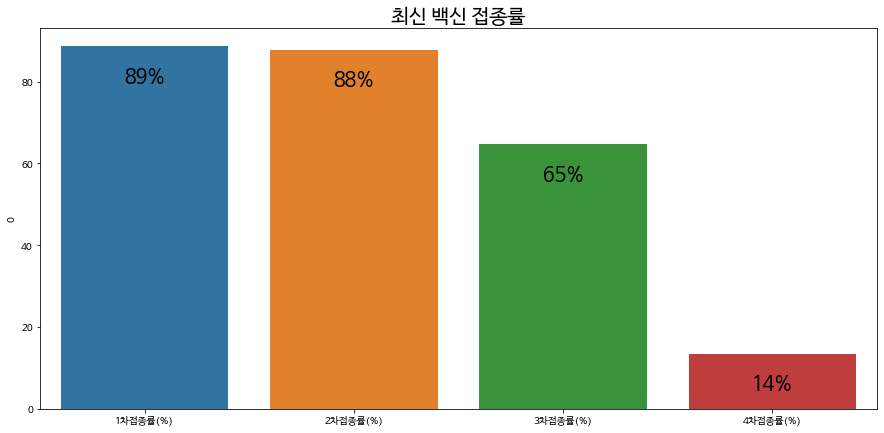

In [44]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = ['1차접종률(%)','2차접종률(%)','3차접종률(%)','4차접종률(%)'], y = covid_19[['1차접종률(%)','2차접종률(%)','3차접종률(%)','4차접종률(%)']].iloc[0])
plt.title('최신 백신 접종률',size=20)

for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height() + '%', (p.get_x() + p.get_width()/2., p.get_height()-10), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 10), 
       textcoords='offset points')
plt.show()

In [42]:
# 접종일에 따른 컬럼 시각화
def make_plot(df,x_column):
  plt.figure(figsize=(30,15))

  for i in range(11):
    plt.subplot(6,2,i+1)
    sns.lineplot(x = x_column , y=df.columns[2+i], data=df)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
    plt.title(df.columns[2+i],size=20)
    plt.ylabel('')

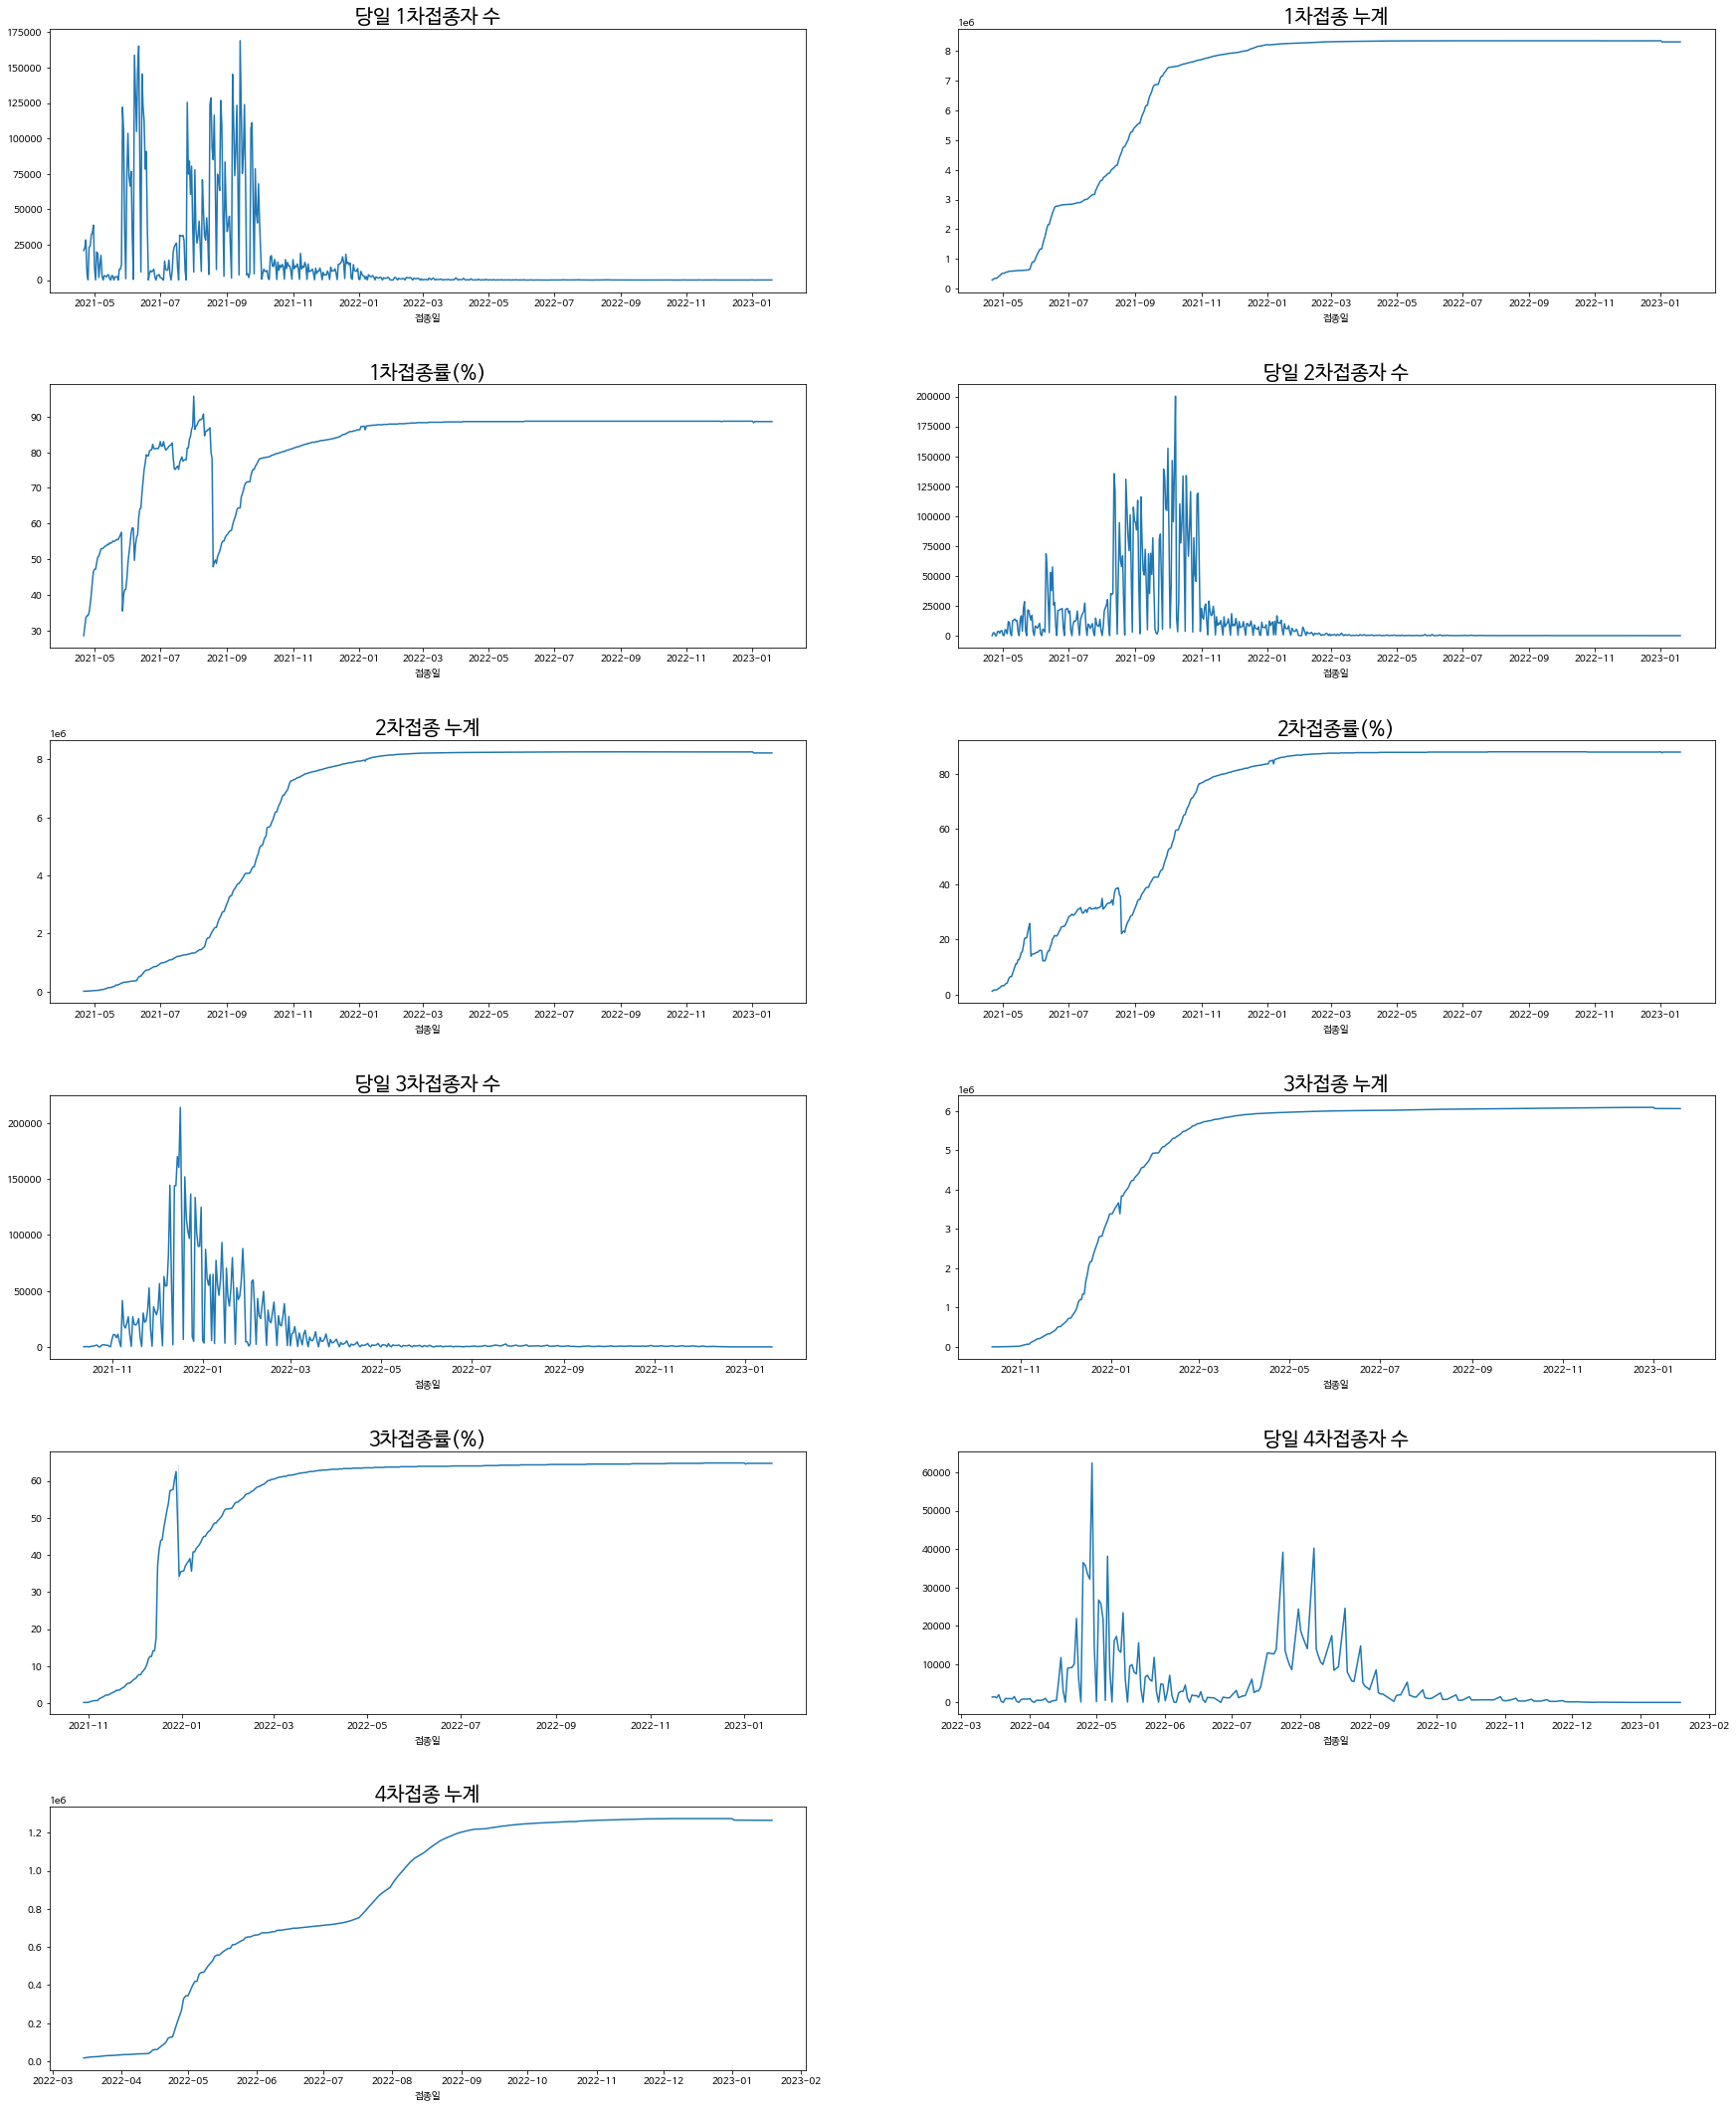

In [43]:
make_plot(covid_19,'접종일')

In [71]:
# 차수별 최다 접종일, 접종자 수
for i in range(4):
  print(f"{str(i+1)}차 접종일 : {covid_19[covid_19[f'당일 {str(i+1)}차접종자 수'] == covid_19[f'당일 {str(i+1)}차접종자 수'].max()]['접종일'].values[0]}")
  print(f"{str(i+1)}차 접종자 수 : {covid_19[covid_19[f'당일 {str(i+1)}차접종자 수'] == covid_19[f'당일 {str(i+1)}차접종자 수'].max()][f'당일 {str(i+1)}차접종자 수'].values[0]}")

1차 접종일 : 2021-09-13T00:00:00.000000000
1차 접종자 수 : 169036
2차 접종일 : 2021-10-08T00:00:00.000000000
2차 접종자 수 : 200186
3차 접종일 : 2021-12-17T00:00:00.000000000
3차 접종자 수 : 213984.0
4차 접종일 : 2022-04-29T00:00:00.000000000
4차 접종자 수 : 62443.0


In [74]:
# 요일별 접종 수
year = covid_19.groupby('년',as_index=False).sum()
month = covid_19.groupby('월',as_index=False).sum()
day = covid_19.groupby('요일',as_index=False).sum()

weekday_list = ['월', '화', '수', '목', '금', '토', '일']
day['요일'] = day['요일'].apply(lambda x : weekday_list[x])

day.head()

,요일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),당일 동절기접종자 수,동절기접종 누계,동절기접종률(%)
0,월,747787533,1632180,632682120,7472.90,1359639,579225832,6378.10,1129395.00,328431689.00,3544.70,211298.00,39966511.00,424.80,163190.00,7774609.00,82.80
1,화,739307579,1299225,625668439,7399.80,1334657,572326408,6307.20,843504.00,323084299.00,3490.20,195590.00,38919831.00,413.70,166368.00,8089328.00,86.20
2,수,741330980,1090534,626919284,7435.70,1144997,573182327,6317.30,913776.00,321173309.00,3471.50,161711.00,37809672.00,402.30,147248.00,8227303.00,87.60
3,목,746315821,1411900,628514163,7410.90,1515036,574965789,6321.00,1013050.00,325087799.00,3500.80,166834.00,38834142.00,413.00,151479.00,8385860.00,89.50
4,금,464773292,1600480,380132942,4780.80,1871714,329269907,3712.20,1342335.00,144423318.00,1582.20,205035.00,4944935.00,52.80,0.00,0.00,0.00


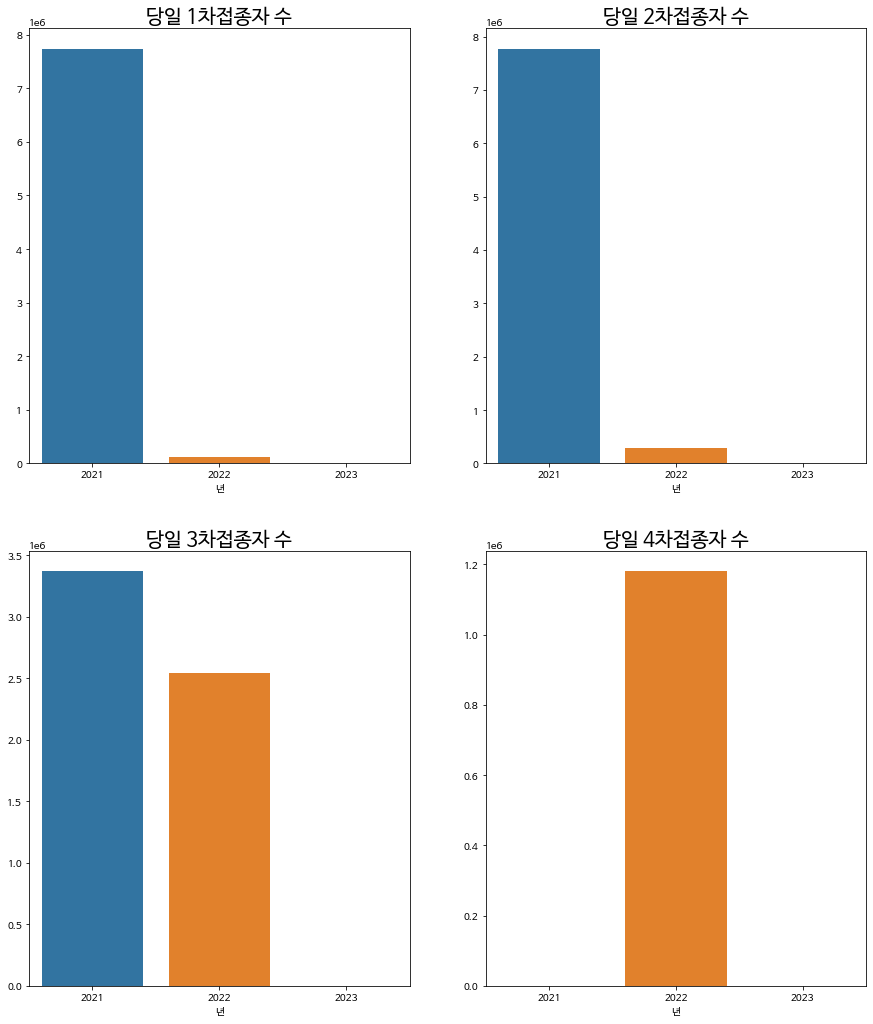

In [88]:
# 년도별 백신 접종자 수
plt.figure(figsize=(15,7))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.2)
col_list = ['당일 1차접종자 수','당일 2차접종자 수','당일 3차접종자 수','당일 4차접종자 수']

for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x='년',y=year[col_list[i]],data=year)
  plt.title(col_list[i],size=20)
  plt.ylabel('')

plt.show()

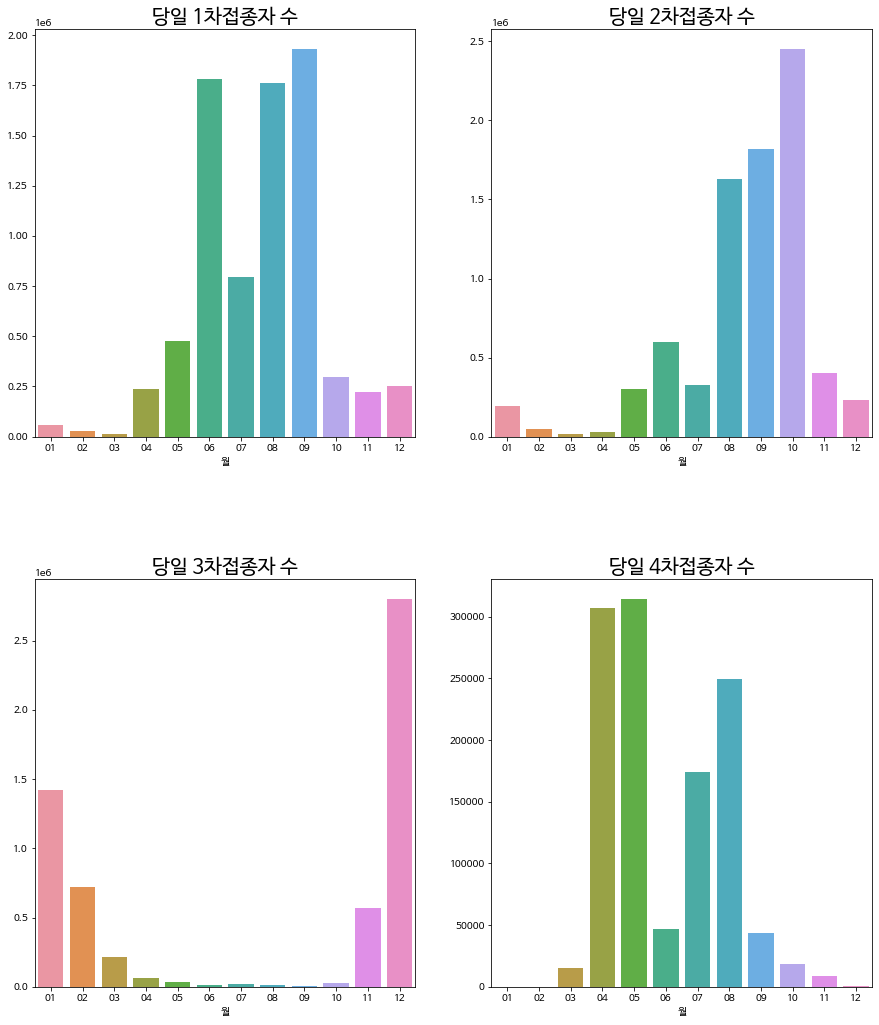

In [90]:
# 월별 접종자 수
plt.figure(figsize=(15,7))

col_list = ['당일 1차접종자 수','당일 2차접종자 수','당일 3차접종자 수','당일 4차접종자 수']
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x='월',y=month[col_list[i]],data=month)
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
  plt.title(col_list[i],size=20)
  plt.ylabel('')

plt.show()

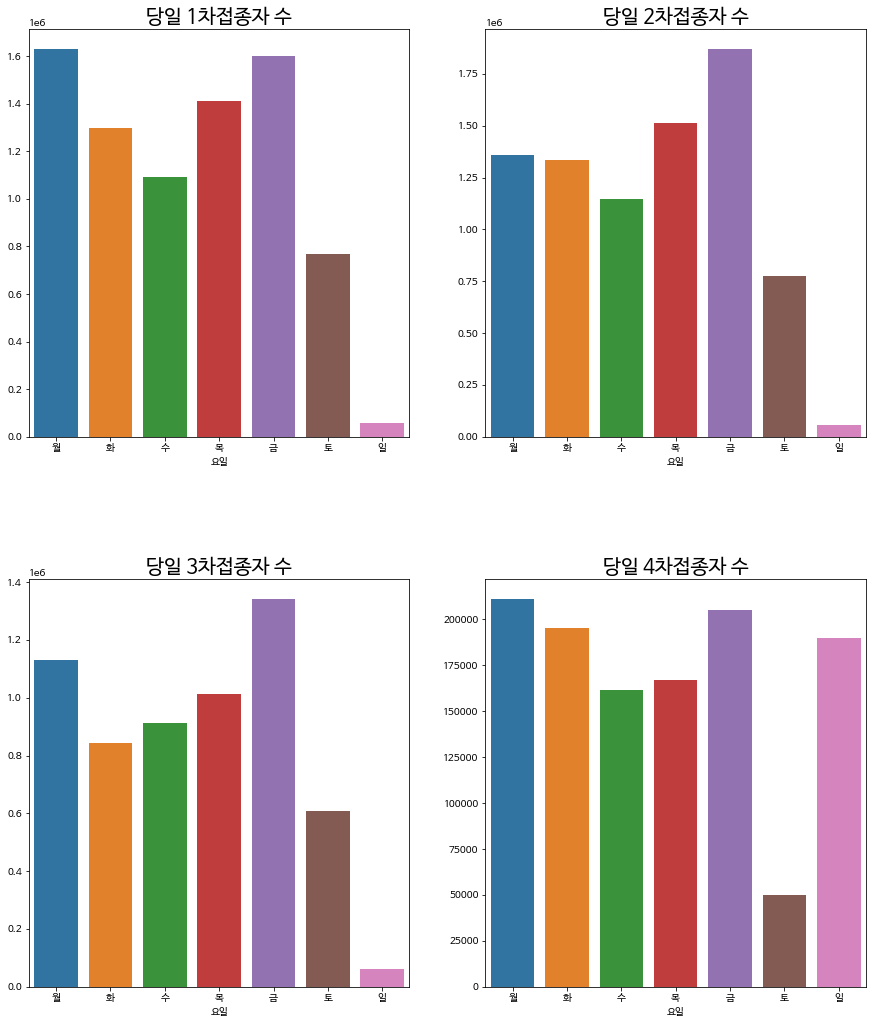

In [91]:
# 요일별 접종자수
plt.figure(figsize=(15,7))

col_list = ['당일 1차접종자 수','당일 2차접종자 수','당일 3차접종자 수','당일 4차접종자 수']
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x='요일',y=day[col_list[i]],data=day)
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
  plt.title(col_list[i],size=20)
  plt.ylabel('')

plt.show()

# 시각화 결과
 * 년,월,요일별 백신 접종 현황은?<br><br>
  a) 모든 백신은 배포된 직후 바로 접종받기에 년,월은 백신 배포 시기와 관련이 있게 나타났다.<br><br>
  b) 2021년 5월부터 7월 사이의 누적 접종자수가 급증하는 것으로 보아 이 시기에 코로나가 크게 유행한 것으로 보인다.<br><br>
  c) 백신 접종 요일은 주말보다는 평일에 더 많이 접종하며, 한 주의 시작과 끝인 월요일과 금요일에 많이 접종하는 것으로 나타났다.<br><br>

 * 백신별 최신 접종률은?<br><br>
 a) 1,2차는 각각 89,88%의 접종률을 보이며 대다수의 사람들이 2차까지는 접종했다.<br><br>
 b) 하지만, 3,4차의 경우 60%,14%의 접종률로 사람들이 이전의 백신만큼 접종 필요성을 느끼지 못하는 것으로 보인다<br><br>

